<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Digital-Image-Processing/blob/main/Image_Segmentation_Region_growing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def distance(a,b):
  return np.abs(a-b)

In [37]:
def region_growing_average(img,img_t,tolerence,seed):
  # where to search in image (x,y) coordinates of pixel
  x=seed[0]
  y=seed[1]
  # to keep acount of locations traversed so that no need to go again to that location
  img_t[x,y]=1
  # avg of all pixels traversed
  avg=np.mean(img[np.where(img_t==1)])
  # checking if 4-neighbourhood pixels are within tolerence value and adds to region
  if (y+1<img.shape[1] and img_t[x,y+1]==0) and (distance(avg,img[x,y+1])<tolerence):
    region_growing_average(img,img_t,tolerence,[x,y+1])
  if (y-1>=0 and img_t[x,y-1]==0) and (distance(avg,img[x,y-1])<tolerence):
    region_growing_average(img,img_t,tolerence,[x,y-1])
  if (x+1<img.shape[0] and img_t[x+1,y]==0) and (distance(avg,img[x+1,y])<tolerence):
    region_growing_average(img,img_t,tolerence,[x+1,y])
  if (x-1>=0 and img_t[x-1,y]==0) and (distance(avg,img[x-1,y])<tolerence):
    region_growing_average(img,img_t,tolerence,[x-1,y])
  # returns threshold image
  return img_t

In [38]:
img_test=np.zeros([15,15])
img_test[2:5,4:12]=100+np.random.randint(0,3,[3,8])
img_test[5:13,2:5]=112+np.random.randint(0,20,[8,3])

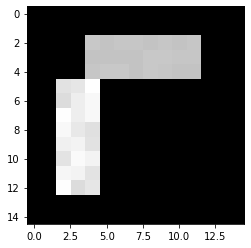

In [39]:
plt.imshow(img_test,cmap="gray")

In [40]:
img_1=np.zeros([15,15])
region_growing_average(img_test,img_1,8,[6,3])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

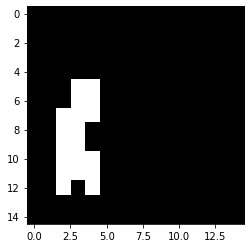

In [41]:
plt.imshow(255*img_1,cmap="gray")

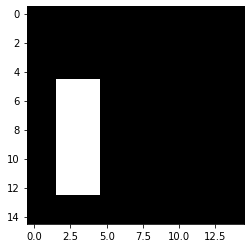

In [42]:
plt.imshow(region_growing_average(img_test,np.zeros(img_test.shape),16,[6,3]),cmap="gray")

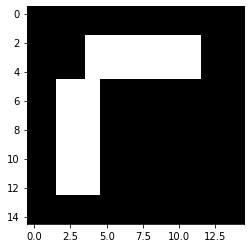

In [43]:
plt.imshow(region_growing_average(img_test,np.zeros(img_test.shape),100,[6,3]),cmap="gray")

In [44]:
!wget https://github.com/maponti/imageprocessing_course_icmc/raw/master/images/board.jpg

--2021-11-07 13:58:02--  https://github.com/maponti/imageprocessing_course_icmc/raw/master/images/board.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/maponti/imageprocessing_course_icmc/master/images/board.jpg [following]
--2021-11-07 13:58:02--  https://raw.githubusercontent.com/maponti/imageprocessing_course_icmc/master/images/board.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97621 (95K) [image/jpeg]
Saving to: ‘board.jpg’

board.jpg           100%[===================>]  95.33K  --.-KB/s    in 0.008s  

2021-11-07 13:58:02 (11.8 MB/s) - ‘board.jpg’ saved [97621/97621]



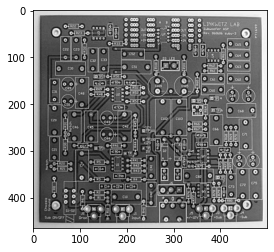

In [52]:
plt.imshow(img,cmap="gray")

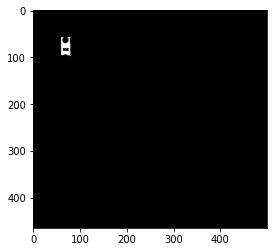

In [47]:
img=imageio.imread("board.jpg")
img_seed=np.zeros(img.shape)
plt.imshow(region_growing_average(img,img_seed,25,[60,60]),cmap="gray")

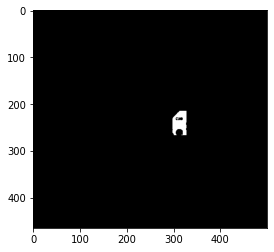

In [51]:
img_seed=np.zeros(img.shape)
plt.imshow(region_growing_average(img,img_seed,25,[256,300]),cmap="gray")